In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

1) Зазгрузить тренировочный датасет. Вывести количество примеров и количество признаков.

In [2]:
ds = pd.read_csv('train.csv')
ds.describe()
ds.head()
print(ds.shape)
ds.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


2) Удалить все признаки с отсутствующими значениями.

In [3]:
ds = ds.dropna(axis=0, how='any')

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Получается что осталось всего 183 записи, пропала бОльшая часть информации, осталась 1/5 часть от всего объема информации. Поэтому нельзя удалять таким образом.

In [5]:
ds = pd.read_csv('train.csv')

In [6]:
ds['Age'] = ds['Age'].fillna(-1)

In [7]:
print(ds['Fare'].median())
ds['Fare'].describe()

14.4542


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
ds['Fare'] = ds['Fare'].fillna(ds['Fare'].median())

In [9]:
print(ds['Embarked'].head())
ds['Embarked'].describe()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
ds['Embarked'] = ds['Embarked'].fillna('S')

In [11]:
ds['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [12]:
ds['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [13]:
ds.drop("Cabin",axis=1,inplace=True)

In [14]:
# could not convert string to float: 'Q'
# переводим перечислимые строки в числа

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

ds['Embarked'] = encoder.fit_transform(ds['Embarked'])
ds['Sex'] = encoder.fit_transform(ds['Sex'])

3) Построить графики выживших в зависимости от разных признаков. Выбрать оптимальный признаки, объяснить почему выбор пал на них.

<IPython.core.display.Javascript object>


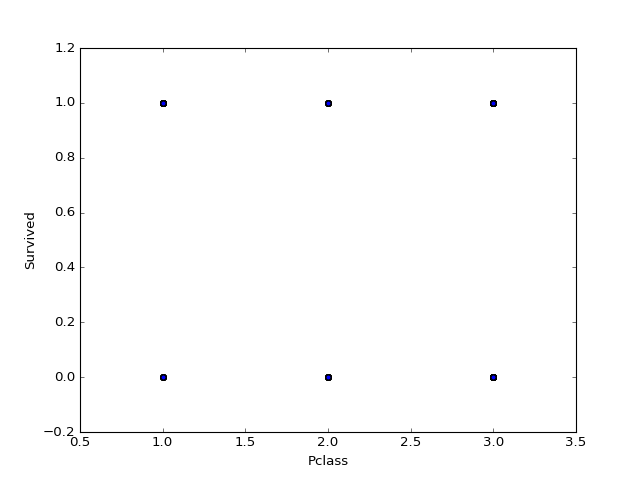

<IPython.core.display.Javascript object>


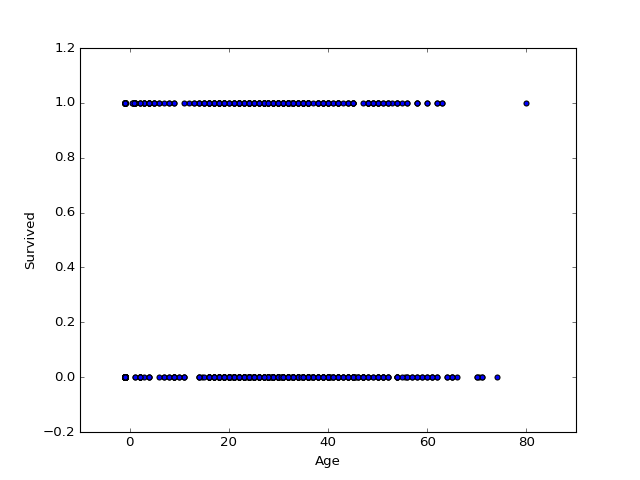

<IPython.core.display.Javascript object>


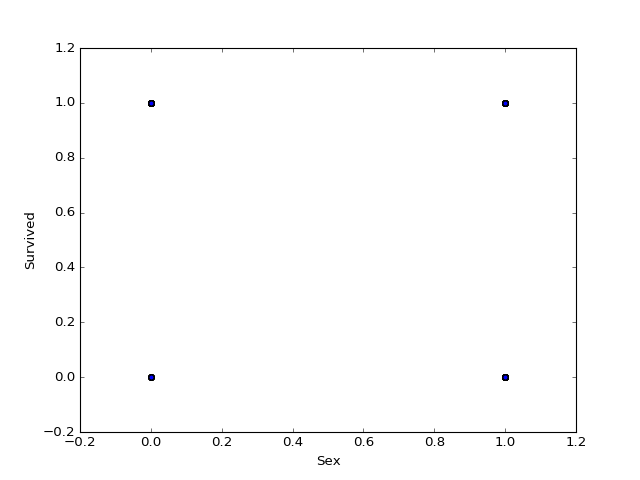

<IPython.core.display.Javascript object>


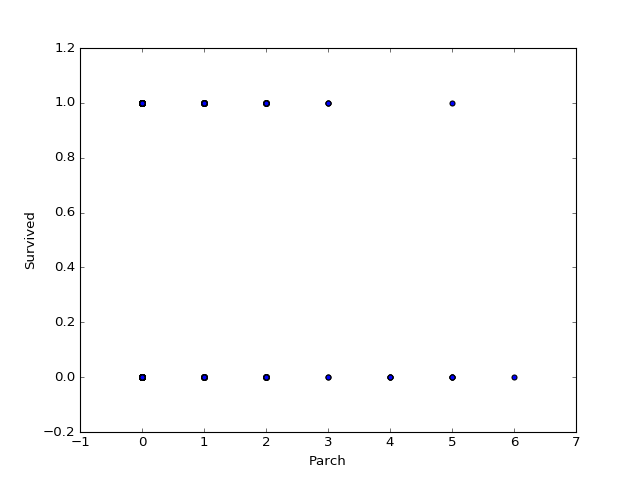

<IPython.core.display.Javascript object>


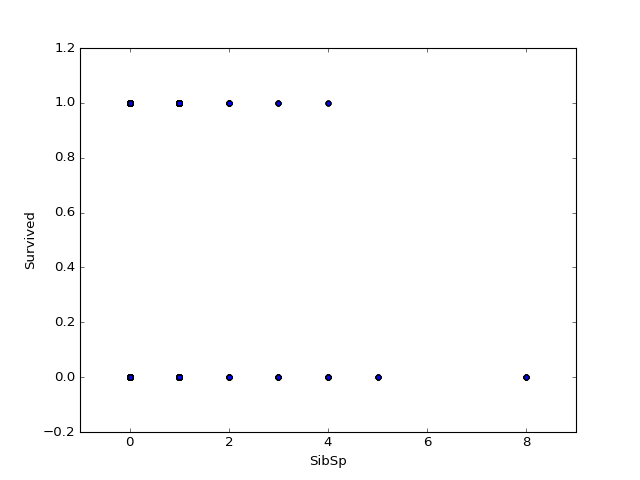

<IPython.core.display.Javascript object>


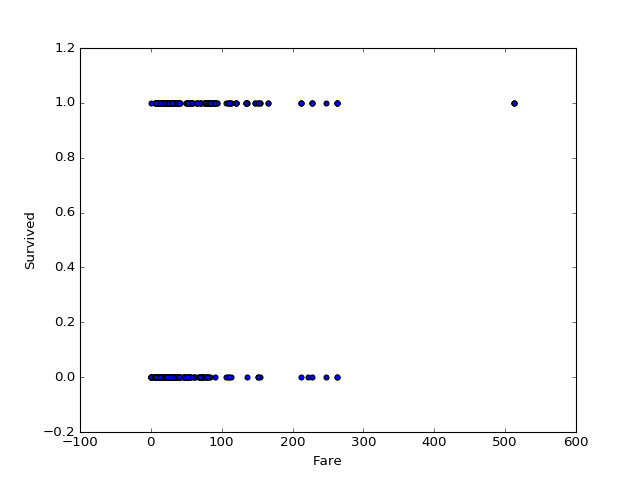

<IPython.core.display.Javascript object>


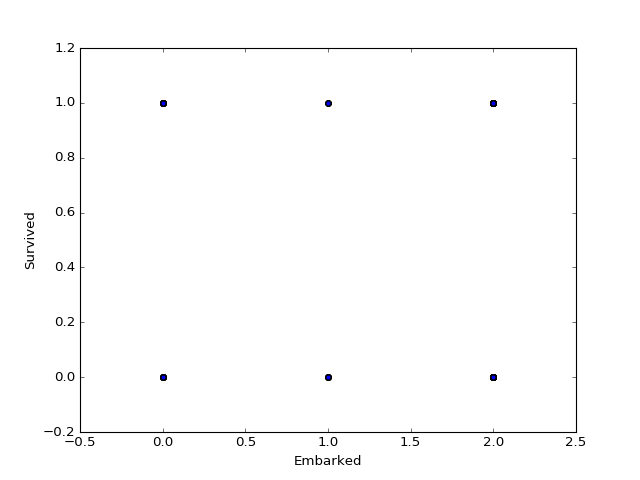

In [15]:
survived = ds['Survived']

features = ["Pclass", "Age", "Sex", "Parch", "SibSp", "Fare", "Embarked"]
#for f in ds:
for f in features:
    #print(f)
    plt.figure()
    plt.scatter(ds[f], survived)
    plt.xlabel(f)
    plt.ylabel('Survived')
    plt.show()

Выбрана следующие параметры: "Pclass", "Age", "Sex", "Parch", "SibSp", "Fare", "Embarked"


4) Построить классификаторы на основе этих признаков. (Логистическая регрессия, SVM, Решающие деревья, Случайный лес)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

f = ["Pclass", "Age", "Sex", "Parch", "SibSp", "Fare", "Embarked"]

test_ds = pd.read_csv("test.csv")
test_ds['Age'] = test_ds['Age'].fillna(-1)
test_ds['Fare'] = test_ds['Fare'].fillna(ds['Fare'].median())

#test_ds.drop("Cabin",axis=1,inplace=True)
X_train = ds[f]
Y_train = ds["Survived"]


test_ds['Embarked'] = encoder.fit_transform(test_ds['Embarked'])
test_ds['Sex'] = encoder.fit_transform(test_ds['Sex'])
X_test  = test_ds[f]

In [17]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [29]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.80134680134680136

In [30]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.89786756453423122

In [31]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.98204264870931535

5) Использую тестовую выборку измерить качество. (Precision, Recall, F-меру)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [23]:
precision_score(Y_train, Y_pred)

6) Изменяя параметры, набор признаков найти решение, дающее большую точность по сравнению с решениями из пункта 4)

сделано в п. 4

7) Отослать свое решение в соревнование на платформе kaggle. Прислать полученный результат (аккаунт, score).

account - https://www.kaggle.com/isvforall 

score - 0.78469

In [32]:
result = pd.DataFrame({"PassengerId": test_ds["PassengerId"], "Survived": Y_pred})
result.to_csv('result.csv', index=False)